In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15, 10
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

def get_file_using_PublicURL(public_url):
  file_id_url = public_url.split('/')[-2]
  return 'https://drive.google.com/uc?id=' + file_id_url

df = pd.read_csv( get_file_using_PublicURL('https://drive.google.com/file/d/1wlgmAAJyG48fJm1uighAUHruU_0PBP1S/view?usp=sharing'), index_col = 0 )
pd.set_option('display.max_columns', None)

In [2]:
df.sample(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,93,2017,October,32,2,2,3,2,0.0,1,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,134.00,0,4,Check-Out
Resort Hotel,1,30,2017,November,36,5,0,1,2,0.0,0,Full Board,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,149.0,NaN,0,Personal,143.50,0,0,Canceled
City Hotel,1,405,2018,October,33,10,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1.0,NaN,0,Personal,65.00,0,0,Canceled
City Hotel,1,11,2018,August,25,14,0,3,2,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,Non Refund,NaN,51.0,0,Personal,90.00,0,0,Canceled
Resort Hotel,1,26,2019,September,29,22,2,6,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,205.00,0,0,Canceled
City Hotel,1,118,2018,August,24,6,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,37.0,NaN,0,Family,120.00,0,0,Canceled
City Hotel,0,22,2018,April,8,19,0,2,2,0.0,0,No Meal,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,81.00,0,1,Check-Out
City Hotel,1,71,2018,August,25,14,0,3,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,236.0,NaN,0,Personal,120.00,0,0,Canceled
City Hotel,1,48,2018,December,41,5,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,3.0,NaN,0,Personal,120.00,0,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, Resort Hotel to City Hotel
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_weekdays_nights        119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  city  

● Data terdiri atas 119390 row dan memiliki 29 column <br>
● Terdapat beberapa kolom memiliki nilai null seperti children, city, agent, dan company

### **Data Processing**

In [4]:
# cek data duplicated
print('data yang terduplikat sebanyak',df.duplicated().sum())

data yang terduplikat sebanyak 33262


In [5]:
#drop duplicate
df.drop_duplicates(keep='first', inplace=True)

In [6]:
# cek data duplicated kembali
print('data yang terduplikat sebanyak',df.duplicated().sum())

data yang terduplikat sebanyak 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86128 entries, Resort Hotel to City Hotel
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86128 non-null  int64  
 1   lead_time                       86128 non-null  int64  
 2   arrival_date_year               86128 non-null  int64  
 3   arrival_date_month              86128 non-null  object 
 4   arrival_date_week_number        86128 non-null  int64  
 5   arrival_date_day_of_month       86128 non-null  int64  
 6   stays_in_weekend_nights         86128 non-null  int64  
 7   stays_in_weekdays_nights        86128 non-null  int64  
 8   adults                          86128 non-null  int64  
 9   children                        86124 non-null  float64
 10  babies                          86128 non-null  int64  
 11  meal                            86128 non-null  object 
 12  city                 

In [8]:
df.isna().sum()

is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11940
company                           81018
days_in_waiting_list                  0
customer_type                         0
adr                                   0


In [9]:
## Handling null values
# Null values pada kolom 'children' berarti 0 children
df['children'] = df['children'].fillna(0)
# Null values pada kolom 'city' dapat diubah menjadi Unknown
df['city'] = df['city'].fillna('Unknown')
# null pada kolom 'agent' and 'company' berarti booking tidak berasal dari agensi sehingga dapat diganti dengan 0. 
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
# Check null values again
df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [10]:
# Ubah tipe data
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [11]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [12]:
# Mengubah Value Undefined menjadi No Meal
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     67087
No Meal        9896
Dinner         8798
Full Board      347
Name: meal, dtype: int64

In [13]:
#cek data kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86128 entries, Resort Hotel to City Hotel
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86128 non-null  int64  
 1   lead_time                       86128 non-null  int64  
 2   arrival_date_year               86128 non-null  int64  
 3   arrival_date_month              86128 non-null  object 
 4   arrival_date_week_number        86128 non-null  int64  
 5   arrival_date_day_of_month       86128 non-null  int64  
 6   stays_in_weekend_nights         86128 non-null  int64  
 7   stays_in_weekdays_nights        86128 non-null  int64  
 8   adults                          86128 non-null  int64  
 9   children                        86128 non-null  int64  
 10  babies                          86128 non-null  int64  
 11  meal                            86128 non-null  object 
 12  city                 

In [14]:
# menghapus data 0 tamu dan 0 malam
# Buat kolom baru 'total_guests' dari penjumlahan kolom adults, children dan babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data dengan 0 tamu: {0} dari {1} total data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
# Buat kolom baru 'stay_duration' dengan menjumlahkan kolom 'stays_in_weekend_nights' dan 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data dengan 0 malam: {0} dari {1} total data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
# Menghapus data yang tidak perlu
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('sebelum pre-processing:', df.shape[0])
print('setelah pre-processing:', df_clean.shape[0])

Data dengan 0 tamu: 165 dari 86128 total data
Data dengan 0 malam: 645 dari 86128 total data
sebelum pre-processing: 86128
setelah pre-processing: 85377


### **Monthly Hotel Booking Analysis Based on Hotel Type**



In [15]:
df2 = df_clean.copy()

In [16]:
#aggragasi total booking berdasarkan type hotel, bulan dan tahun
df2_group = df2.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique',
                                                             'is_canceled' : 'count'}).reset_index()
df2_group.columns = ['hotel_type','arrival_month','unique_year','total_booking']
df2_group

,hotel_type,arrival_month,unique_year,total_booking
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2951
4,City Hotel,January,2,2849
5,City Hotel,July,2,5321
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4040


Data bulan September dan Oktober berdasarkan data 3 tahun terakhir, sementara bulan lainnya dari 2 tahun terakhir oleh karena itu perlu dinormalisasi

In [17]:
# Normalisasi data dengan menghitung rata-rata pesanan perbulan pada tahun yang berbeda
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2_group['Average_Booking'] = round(df2_group['total_booking']/df2_group['unique_year'])
df2_group['month']=df2_group['arrival_month'].str[:3]
df2_group['month']= pd.Categorical(df2_group['month'], categories=ordered_months, ordered=True)
df2_group

,hotel_type,arrival_month,unique_year,total_booking,Average_Booking,month
0,City Hotel,April,2,3514,1757.0,Apr
1,City Hotel,August,2,4908,2454.0,Aug
2,City Hotel,December,2,4009,2004.0,Dec
3,City Hotel,February,2,2951,1476.0,Feb
4,City Hotel,January,2,2849,1424.0,Jan
5,City Hotel,July,2,5321,2660.0,Jul
6,City Hotel,June,2,5017,2508.0,Jun
7,City Hotel,March,2,2674,1337.0,Mar
8,City Hotel,May,2,4777,2388.0,May
9,City Hotel,November,2,4040,2020.0,Nov


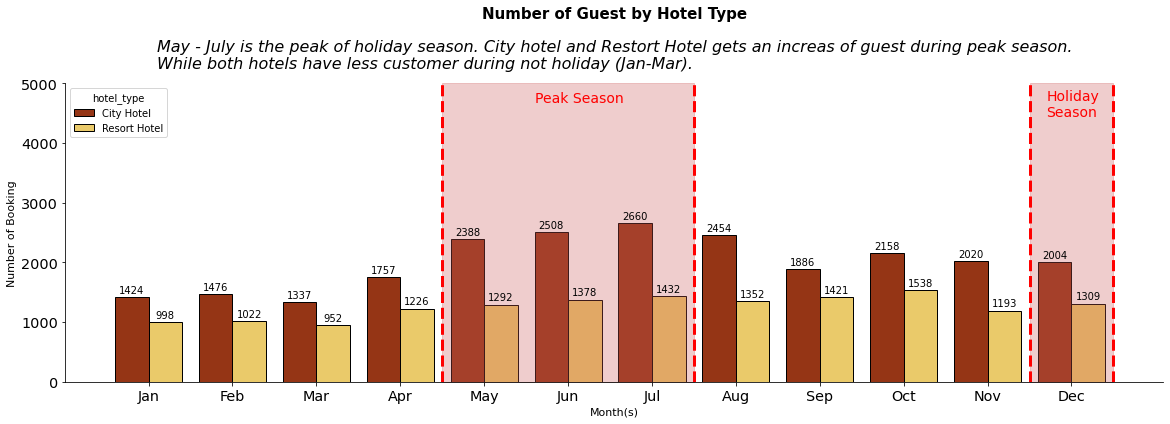

In [18]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Number of Guest by Hotel Type", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=0.1, y=5250, s="May - July is the peak of holiday season. City hotel and Restort Hotel gets an increas of guest during peak season.\nWhile both hotels have less customer during not holiday (Jan-Mar).", fontsize=16, fontstyle='italic')
sns.barplot(x='month', y='Average_Booking', data=df2_group, hue='hotel_type', edgecolor='black', palette='afmhot')

plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Number of Booking', fontsize=11)
plt.ylim(0, 5000)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(3.5, ls='--', color='red')
plt.axvline(6.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,7.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=4.6, y=4750, s='Peak Season', fontsize=14, color='red', va='center')

plt.axvline(10.5, ls='--', color='red')
plt.axvline(11.5, ls='--', color='red')
plt.stackplot(np.arange(10.5,12.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=10.7, y=4650, s='Holiday\nSeason', fontsize=14, color='red', va='center')

sns.despine()
plt.tight_layout()
plt.savefig('num_booking.png', dpi=200)

### Impact Analaysis of Stay Duration on Hotel Bookings Cancellation Rates

In [19]:
df3 = df_clean.copy()

In [20]:
df3['stay_duration'].value_counts()

3     17527
1     16908
2     15331
4     13382
7      7464
5      6698
6      3249
10     1071
8      1059
14      857
9       778
11      366
12      196
13      132
15       69
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
26        6
24        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
46        1
45        1
38        1
48        1
34        1
Name: stay_duration, dtype: int64

In [21]:
duration_list =[]
for i in df3['stay_duration']:
    if i >= 1 and i <= 7 :
        group = '1 week'
    elif i >= 8 and i <= 14:
        group = '2 week'
    elif i >= 15 and i <= 21:
        group = '3 week'
    elif i >= 22 and i <= 28:
        group = '4 week'
    else:
        group = '>4 week'
    duration_list.append(group)
df3['stay_duration'] = duration_list
df3['stay_duration'].value_counts()

1 week     80559
2 week      4459
3 week       234
4 week        81
>4 week       44
Name: stay_duration, dtype: int64

In [22]:
df3_group = df3.groupby(['hotel', 'is_canceled', 'stay_duration']).agg({'arrival_date_month':'count'}).reset_index()
df3_group

,hotel,is_canceled,stay_duration,arrival_date_month
0,City Hotel,0,1 week,35844
1,City Hotel,0,2 week,486
2,City Hotel,0,3 week,27
3,City Hotel,0,4 week,4
4,City Hotel,0,>4 week,2
5,City Hotel,1,1 week,15192
6,City Hotel,1,2 week,523
7,City Hotel,1,3 week,73
8,City Hotel,1,4 week,21
9,City Hotel,1,>4 week,18


In [23]:
df3_pivot = df3_group.pivot_table(index=['hotel', 'stay_duration'],
                                  columns=['is_canceled'],
                                  values=['arrival_date_month']).reset_index()
df3_pivot.columns = ['hotel','stay_duration','not_canceled','canceled']
df3_pivot

,hotel,stay_duration,not_canceled,canceled
0,City Hotel,1 week,35844,15192
1,City Hotel,2 week,486,523
2,City Hotel,3 week,27,73
3,City Hotel,4 week,4,21
4,City Hotel,>4 week,2,18
5,Resort Hotel,1 week,22665,6858
6,Resort Hotel,2 week,2511,939
7,Resort Hotel,3 week,87,47
8,Resort Hotel,4 week,36,20
9,Resort Hotel,>4 week,18,6


In [24]:
df3_pivot['cancel_rate'] = round(df3_pivot['canceled'] * 100 / (df3_pivot['canceled']+df3_pivot['not_canceled']),2)
df3_pivot

,hotel,stay_duration,not_canceled,canceled,cancel_rate
0,City Hotel,1 week,35844,15192,29.77
1,City Hotel,2 week,486,523,51.83
2,City Hotel,3 week,27,73,73.00
3,City Hotel,4 week,4,21,84.00
4,City Hotel,>4 week,2,18,90.00
5,Resort Hotel,1 week,22665,6858,23.23
6,Resort Hotel,2 week,2511,939,27.22
7,Resort Hotel,3 week,87,47,35.07
8,Resort Hotel,4 week,36,20,35.71
9,Resort Hotel,>4 week,18,6,25.00


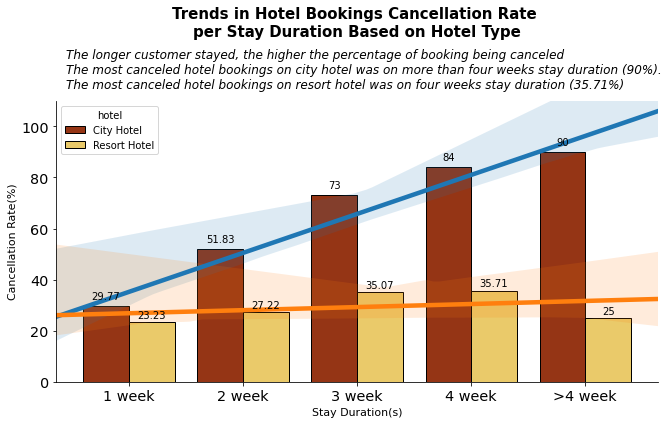

In [25]:
# Visualising impact analysis of total nights on hotel bookings cancellation rate
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Trends in Hotel Bookings Cancellation Rate \nper Stay Duration Based on Hotel Type", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-0.55, y=115, s="The longer customer stayed, the higher the percentage of booking being canceled\nThe most canceled hotel bookings on city hotel was on more than four weeks stay duration (90%).\nThe most canceled hotel bookings on resort hotel was on four weeks stay duration (35.71%)", fontsize=12, fontstyle='italic')
sns.barplot(x='stay_duration', y='cancel_rate', data=df3_pivot, hue='hotel', edgecolor='black', palette='afmhot')

sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df3_pivot[df3_pivot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(df3_pivot[df3_pivot['hotel'] == 'City Hotel'])), y='cancel_rate', 
            data=df3_pivot[df3_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 110)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
#plt.savefig('cancelrate_stayduration.png', dpi=200)

### **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [26]:
df4 = df_clean.copy()
df4['lead_time'].value_counts()

0      5632
1      3130
2      1891
3      1683
4      1538
       ... 
410       1
605       1
400       1
626       1
463       1
Name: lead_time, Length: 478, dtype: int64

In [27]:
lead_time = []
for i in df4['lead_time']:
    if i <= 60 :
        lead_group = '1-2 Month'
    elif i >= 61 and i <= 120 :
        lead_group = '3-4 Month'
    elif i >= 121 and i <= 180 :
        lead_group = '5-6 Month'
    elif i >= 181 and i <= 240 :
        lead_group = '7-8 Month'
    elif i >= 241 and i <= 300 :
        lead_group = '9-10 Month'
    elif i >= 301 and i <= 360 :
        lead_group = '11-12 Month'
    else:
        lead_group = '>12 Month'
    lead_time.append(lead_group)

df4['lead_time'] = lead_time    
df4['lead_time'].value_counts()

1-2 Month      46900
3-4 Month      16288
5-6 Month      10825
7-8 Month       6284
9-10 Month      2907
11-12 Month     1558
>12 Month        615
Name: lead_time, dtype: int64

In [28]:
df4_group = df4.groupby(['hotel', 'is_canceled', 'lead_time']).agg({'arrival_date_month':'count'}).reset_index()
df4_group

,hotel,is_canceled,lead_time,arrival_date_month
0,City Hotel,0,1-2 Month,21841
1,City Hotel,0,11-12 Month,287
2,City Hotel,0,3-4 Month,7100
3,City Hotel,0,5-6 Month,4139
4,City Hotel,0,7-8 Month,2078
5,City Hotel,0,9-10 Month,746
6,City Hotel,0,>12 Month,172
7,City Hotel,1,1-2 Month,6811
8,City Hotel,1,11-12 Month,417
9,City Hotel,1,3-4 Month,3772


In [29]:
df4_pivot = df4_group.pivot_table(index=['hotel', 'lead_time'],
                                  columns=['is_canceled'],
                                  values=['arrival_date_month']).reset_index()
df4_pivot.columns = ['hotel','lead_time','not_canceled','canceled']
df4_pivot

,hotel,lead_time,not_canceled,canceled
0,City Hotel,1-2 Month,21841,6811
1,City Hotel,11-12 Month,287,417
2,City Hotel,3-4 Month,7100,3772
3,City Hotel,5-6 Month,4139,2482
4,City Hotel,7-8 Month,2078,1405
5,City Hotel,9-10 Month,746,741
6,City Hotel,>12 Month,172,199
7,Resort Hotel,1-2 Month,15266,2982
8,Resort Hotel,11-12 Month,484,370
9,Resort Hotel,3-4 Month,3690,1726


In [30]:
df4_pivot['cancel_rate'] = round(df4_pivot['canceled'] * 100 / (df4_pivot['canceled']+df4_pivot['not_canceled']),2)
df4_pivot

,hotel,lead_time,not_canceled,canceled,cancel_rate
0,City Hotel,1-2 Month,21841,6811,23.77
1,City Hotel,11-12 Month,287,417,59.23
2,City Hotel,3-4 Month,7100,3772,34.69
3,City Hotel,5-6 Month,4139,2482,37.49
4,City Hotel,7-8 Month,2078,1405,40.34
5,City Hotel,9-10 Month,746,741,49.83
6,City Hotel,>12 Month,172,199,53.64
7,Resort Hotel,1-2 Month,15266,2982,16.34
8,Resort Hotel,11-12 Month,484,370,43.33
9,Resort Hotel,3-4 Month,3690,1726,31.87


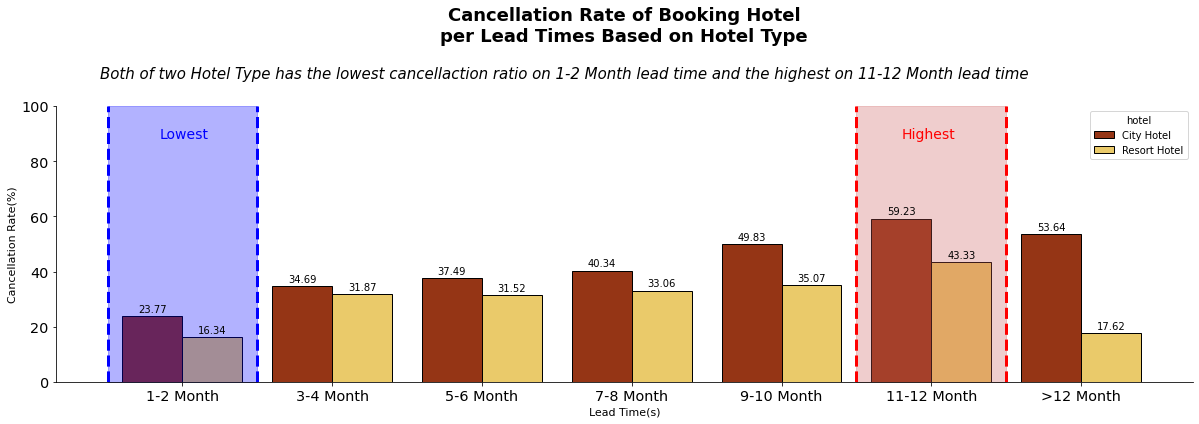

In [31]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Cancellation Rate of Booking Hotel\nper Lead Times Based on Hotel Type", fontsize=18, color='black', weight='bold', pad=65)
plt.text(x=-0.55, y=110, s="Both of two Hotel Type has the lowest cancellaction ratio on 1-2 Month lead time and the highest on 11-12 Month lead time", fontsize=15, fontstyle='italic')
sns.barplot(x='lead_time', y='cancel_rate', data=df4_pivot, hue='hotel', order = ['1-2 Month','3-4 Month','5-6 Month','7-8 Month','9-10 Month','11-12 Month','>12 Month'],edgecolor='black', palette='afmhot')


plt.xlabel('Lead Time(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0, 100)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(-0.5, ls='--', color='blue')
plt.axvline(0.5, ls='--', color='blue')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='blue', alpha=0.3)
plt.text(x=-0.15, y=90, s='Lowest', fontsize=14, color='blue', va='center')

plt.axvline(4.5, ls='--', color='red')
plt.axvline(5.5, ls='--', color='red')
plt.stackplot(np.arange(4.5,6.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=4.8, y=90, s='Highest', fontsize=14, color='red', va='center')

sns.despine()
plt.tight_layout()
plt.savefig('cancelrate_leadtimes.png', dpi=200)